# Handwritten Digits Classification - Basics

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.layers.core import Dense, Dropout, Activation

### How output = how many outputs you have here we will distinguish between 10 different digits hence the final layer will be of 10 neurons


In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
x_train[0].shape

(28, 28)

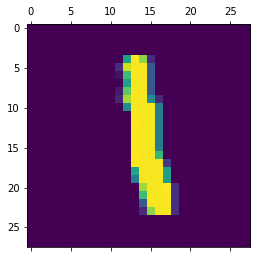

In [7]:
plt.matshow(x_train[6])

### flatten the training data set, as we need to convert the 2D array to 1D array

In [8]:
x_train = x_train/255.0
x_test = x_test /255.0

In [9]:
x_train.shape

(60000, 28, 28)

## Trying Activation Function as = Adam

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer="adam", loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics="accuracy")

model.fit(x_train,y_train,epochs=5,verbose=2)

Epoch 1/5
1875/1875 - 4s - loss: 0.2577 - accuracy: 0.9266
Epoch 2/5
1875/1875 - 3s - loss: 0.1139 - accuracy: 0.9662
Epoch 3/5
1875/1875 - 3s - loss: 0.0781 - accuracy: 0.9762
Epoch 4/5
1875/1875 - 3s - loss: 0.0588 - accuracy: 0.9818
Epoch 5/5
1875/1875 - 3s - loss: 0.0460 - accuracy: 0.9858


In [11]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0807 - accuracy: 0.9752


[0.08069021254777908, 0.9751999974250793]

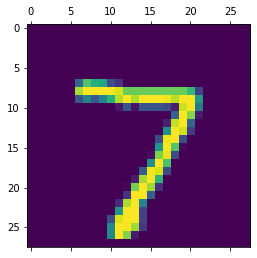

In [12]:
plt.matshow(x_test[0])

In [13]:
y_pred = model.predict(x_test)
y_pred[0]

array([ -6.2302995,  -7.18033  ,  -2.5254254,  -1.277166 , -12.620747 ,
        -7.2073374, -17.484446 ,   9.422789 ,  -6.1279964,  -3.8164296],
      dtype=float32)

In [14]:
np.argmax(y_pred[0])

7

In [15]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:2]

[7, 2]

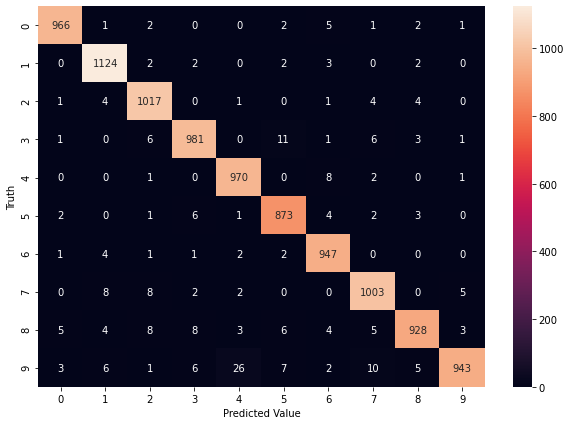

In [16]:
conmatrix = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(conmatrix,annot=True,fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("Truth")
plt.show()


## Trying Activation Function as = Sigmoid

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer="adam", loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics="accuracy")

model.fit(x_train,y_train,epochs=5,verbose=2)

Epoch 1/5
1875/1875 - 4s - loss: 0.3985 - accuracy: 0.8965
Epoch 2/5
1875/1875 - 3s - loss: 0.1931 - accuracy: 0.9450
Epoch 3/5
1875/1875 - 3s - loss: 0.1410 - accuracy: 0.9597
Epoch 4/5
1875/1875 - 4s - loss: 0.1089 - accuracy: 0.9688
Epoch 5/5
1875/1875 - 3s - loss: 0.0872 - accuracy: 0.9751


## Trying Activation Function as = Tanh

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer="adam", loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics="accuracy")

model.fit(x_train,y_train,epochs=5,verbose=2)

Epoch 1/5
1875/1875 - 4s - loss: 0.2852 - accuracy: 0.9174
Epoch 2/5
1875/1875 - 3s - loss: 0.1388 - accuracy: 0.9598
Epoch 3/5
1875/1875 - 3s - loss: 0.0941 - accuracy: 0.9716
Epoch 4/5
1875/1875 - 3s - loss: 0.0692 - accuracy: 0.9796
Epoch 5/5
1875/1875 - 3s - loss: 0.0517 - accuracy: 0.9852
